### Tokenização dos grafos da Wikipédia.

O objetivo é associar a cada elemento do gráfo um número N, que será a tokeninzação da presença ou ausencia de conexão quando a entrada N de um elemento for 0 ou 1 respectivamente.

Os dados são centrados em um nó principal. Portanto logo de cara é possível fazer um dicionário com digamos os N elementos deste primeiro nó. A tática será de passar elemento por elemento checando a presença de novos nós a serem catalogados. O total de elementos neste grafo será chamado T.

Uma vez concluido o dicionário passaremos a criar a representação das conexões. Duas formas são imediatamente provaveis; a primeira usando vetores de T elementos, onde cada elemento i indicará a presença ou ausência de conexão; a segunda consiste de listar os números cujo quais o nó faz conexão.

1 caso: 0100101011110011010110101110101110101110110101     : T elementos

2 caso: 1, 13, 22, 25, 26, 27, 120, 130, 150, 200          : L elementos

Em geral para gráfos muito conexos vale mais a pena usar o primeiro caso e para grafos esparços se usa o segundo.

In [19]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt


In [ ]:
# Importar dados do primeiro nó

central_name = "Mecânica"
data = pd.read_csv(central_name + '/' + central_name + ".csv", header=None)

df = pd.DataFrame(data)

size = len(data)
print("Tamanho do arquivo: ", size)

Tamanho do arquivo:  1596


In [21]:
# Importar dados dos proximos nós

for i in range(1, size):

    # Checar se o arquivo esta mal formatado (possui virgula na linha)
    

    node_name = df[0][i]
    print(node_name)
    data2 = pd.read_csv(central_name + '/' + node_name + ".csv", header=None, quotechar='"')
    data2 = data2[0]
    data = pd.concat([data, data2], axis=0)


    # Remover duplicatas
    data = data.drop_duplicates()

Brasão de armas do Brasil
Ordem e Progresso
Hino Nacional Brasileiro
Brasília
São Paulo
Língua portuguesa
Etnicidade
Pardos
Brasileiros brancos
Afro-brasileiros
Povos indígenas do Brasil
Brasileiros asiáticos
Religião no Brasil
Igreja Católica no Brasil
Protestantismo no Brasil
Irreligião no Brasil
História do espiritismo no Brasil
Umbanda
Candomblé
Gentílico
Brasileiros
Política do Brasil
República federal
Presidencialismo
Presidente do Brasil
Luiz Inácio Lula da Silva
Vice-presidente do Brasil
Geraldo Alckmin
Lista de presidentes da Câmara dos Deputados do Brasil
Arthur Lira
Lista de presidentes do Senado Federal do Brasil
Rodrigo Pacheco
Lista de presidentes do Supremo Tribunal Federal
Luís Roberto Barroso
Congresso Nacional do Brasil
Câmara alta
Senado Federal do Brasil
Câmara baixa
Câmara dos Deputados do Brasil
História do Brasil
Regimento do Governador-Geral
17 de dezembro
1548
Transferência da corte portuguesa para o Brasil
8 de março
1808
Independência do Brasil
7 de setembro


FileNotFoundError: [Errno 2] No such file or directory: 'Brasil/Baníuas.csv'

In [ ]:
# Criar dataframe

df = pd.DataFrame(data)
print(df)
df.rename(columns={0: 'nome'}, inplace=True)

# Adicionar um índice numerado
df.reset_index(drop=True, inplace=True)
df.index.name = 'indice'

# Salvar dataframe

if not os.path.exists(central_name + '_graph'):     #Checar se a pasta existe
    os.makedirs(central_name + '_graph')

df.to_csv(central_name + '_graph/graph.csv', index=False, header=False)

                                0
0               Mecânica clássica
1                    Deslocamento
2                      Velocidade
3              Velocidade escalar
4                      Aceleração
..                            ...
27          Prontuário Eletrônico
28      Recuperação de informação
29      Banco de dados relacional
30          Normalização de dados
31  Representação de conhecimento

[10368 rows x 1 columns]


In [ ]:
# Vamos agora ter uma ideia de se o grafo é espaço ou conexo

# Lista de elementos do grafo com conexão com o nó central
elementos = pd.read_csv(central_name + '/' + central_name + '.csv', header=None)

lista_de_conexoes = []
total_de_conexoes = 0
for j in range(len(elementos)):
    # Abrir arquivo de conexões
    print('elemento: ' , elementos[0][j])
    conexoes = pd.read_csv(central_name + '/' + elementos[0][j] + '.csv', header=None)

    # Observa conexões e transformar de acordo com o dicionário
    indices = []
    for i in range(len(conexoes)):
        indices.append(df[df['nome'] == conexoes[0][i]].index[0])
        #print(conexoes[0][i], indices[i])

    # Ordenar conexões
    indices.sort()
    #print('numero de conexões: ', len(indices))
    lista_de_conexoes.append(len(indices))

    total_de_conexoes += len(indices)

print(total_de_conexoes)

elemento:  Mecânica clássica
elemento:  Deslocamento
elemento:  Velocidade
elemento:  Velocidade escalar
elemento:  Aceleração
elemento:  Aceleração centrípeta
elemento:  Movimento uniforme
elemento:  Movimento uniformemente variado
elemento:  Movimento retilíneo
elemento:  Movimento parabólico
elemento:  Movimento circular
elemento:  Movimento circular uniforme
elemento:  Movimento curvilíneo
elemento:  Movimento harmônico simples
elemento:  Movimento harmônico complexo
elemento:  Força
elemento:  Inércia
elemento:  Produto de inércia
elemento:  Leis de Newton
elemento:  Primeira Lei de Newton
elemento:  Segunda Lei de Newton
elemento:  Terceira Lei de Newton
elemento:  Equações de movimento
elemento:  Ressonância
elemento:  História da física
elemento:  Energia cinética
elemento:  Energia potencial
elemento:  Trabalho (física)
elemento:  Lei da conservação da energia
elemento:  Força conservativa
elemento:  Força de contato
elemento:  Função de Lagrange
elemento:  Potência
elemento: 

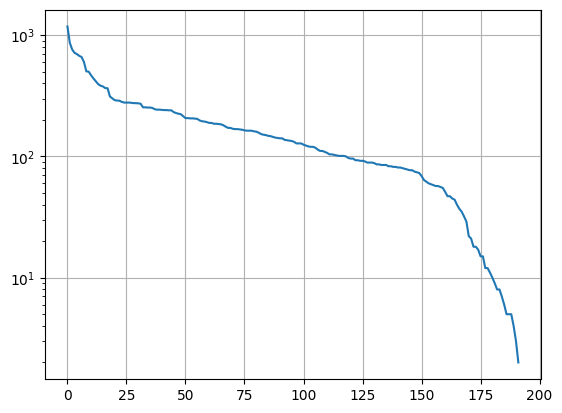

In [ ]:
lista_de_conexoes.sort(reverse=True)
plt.plot(lista_de_conexoes)
plt.grid()
plt.yscale('log')

In [ ]:
# Vamos agora 

# Write to single line in file
with open(central_name + '_graph/connections' + '.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    # Lista de elementos do grafo com conexão com o nó central
    elementos = pd.read_csv(central_name + '/' + central_name + '.csv', header=None)


    lista_de_conexoes = []
    for j in range(len(elementos)):
        # Abrir arquivo de conexões
        print('elemento: ' , elementos[0][j])
        conexoes = pd.read_csv(central_name + '/' + elementos[0][j] + '.csv', header=None)

        # Observa conexões e transformar de acordo com o dicionário
        indices = []
        for i in range(len(conexoes)):
            indices.append(df[df['nome'] == conexoes[0][i]].index[0])
            #print(conexoes[0][i], indices[i])

        # Ordenar conexões
        indices.sort()
        
        
        
        writer.writerow(indices)


elemento:  Mecânica clássica
elemento:  Deslocamento
elemento:  Velocidade
elemento:  Velocidade escalar
elemento:  Aceleração
elemento:  Aceleração centrípeta
elemento:  Movimento uniforme
elemento:  Movimento uniformemente variado
elemento:  Movimento retilíneo
elemento:  Movimento parabólico
elemento:  Movimento circular
elemento:  Movimento circular uniforme
elemento:  Movimento curvilíneo
elemento:  Movimento harmônico simples
elemento:  Movimento harmônico complexo
elemento:  Força
elemento:  Inércia
elemento:  Produto de inércia
elemento:  Leis de Newton
elemento:  Primeira Lei de Newton
elemento:  Segunda Lei de Newton
elemento:  Terceira Lei de Newton
elemento:  Equações de movimento
elemento:  Ressonância
elemento:  História da física
elemento:  Energia cinética
elemento:  Energia potencial
elemento:  Trabalho (física)
elemento:  Lei da conservação da energia
elemento:  Força conservativa
elemento:  Força de contato
elemento:  Função de Lagrange
elemento:  Potência
elemento: 

In [ ]:
# Agora com o dicionário criado iremos criar o arquivo com as conexões

# Primeiro passamos pelos dados novamente, na ordem apresentada no graph.csv

#lista_a_processar = pd.read_csv(central_name + '_graph/graph.csv', header=None)
#lista_a_processar = lista_a_processar[0]

#print(lista_a_processar[1])

# Olhamos as conexões de um arquivo
#for i in range(len(lista_a_processar)):
#    node_observado = pd.read_csv(central_name + '/' + lista_a_processar[0][i] + ".csv", header=None, quotechar='"')


SyntaxError: incomplete input (4182316302.py, line 12)